# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [6]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 4: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*



In [7]:
# Cell type : CodeWrite

def function_for_A(X_train, Y_train, X_test, ret_prob = 0):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    """ 
    pos_indices = np.where(Y_train == 1)[0]
    neg_indices = np.where(Y_train == -1)[0]
    
    mu_pos = np.sum(np.array([X_train[i] for i in pos_indices]), axis = 0)/len(pos_indices)
    mu_neg = np.sum(np.array([X_train[i] for i in neg_indices]), axis = 0)/len(neg_indices)
    
    Y_test_pred = []
    probs = []
    
    mu_pos = np.expand_dims(mu_pos, axis = 0)
    mu_neg = np.expand_dims(mu_neg, axis = 0)
    
    for x in X_test:
        x = np.expand_dims(x, axis = 0)
        
        prob_diff = np.exp(-0.5*np.matmul((x-mu_pos),(x-mu_pos).T)) - np.exp(-0.5*np.matmul((x-mu_neg),(x - mu_neg).T))
        probs.append(np.exp(-0.5*np.matmul((x-mu_pos),(x-mu_pos).T)))
        
        if prob_diff >= 0:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)
    
    if ret_prob == 0:
        return Y_test_pred
    else:
        return [Y_test_pred, probs]
    
def function_for_B(X_train, Y_train, X_test, ret_prob = 0):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos_indices = np.where(Y_train == 1)[0]
    neg_indices = np.where(Y_train == -1)[0]
    
    mu_pos = np.sum(np.array([X_train[i] for i in pos_indices]), axis = 0)/len(pos_indices)
    mu_neg = np.sum(np.array([X_train[i] for i in neg_indices]), axis = 0)/len(neg_indices)
    
    
    sig = np.array(np.matmul(np.array([(X_train[i] - mu_pos) for i in pos_indices]).T,np.array([(X_train[i] - mu_pos) for i in pos_indices])))
    sig += np.array(np.matmul(np.array([(X_train[i] - mu_neg) for i in neg_indices]).T,np.array([(X_train[i] - mu_neg) for i in neg_indices])))
    
    sig /= (len(pos_indices) + len(neg_indices))
    sig_inv = np.linalg.inv(sig)
    
    Y_test_pred = []
    probs = []
    
    mu_pos = np.expand_dims(mu_pos, axis = 0)
    mu_neg = np.expand_dims(mu_neg, axis = 0)
        
    for x in X_test:
        x = np.expand_dims(x, axis = 0)
        
        prob_diff = np.exp(-0.5*np.matmul(np.matmul((x-mu_pos),sig_inv),(x-mu_pos).T)) - np.exp(-0.5*np.matmul(np.matmul((x-mu_neg),sig_inv),(x - mu_neg).T))
        probs.append( np.exp(-0.5*np.matmul(np.matmul((x-mu_pos),sig_inv),(x-mu_pos).T))) 
        
        if prob_diff >= 0:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)
    
    if ret_prob == 0:
        return Y_test_pred
    else:
        return [Y_test_pred, probs]
    

def function_for_C(X_train, Y_train, X_test, ret_prob = 0):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos_indices = np.where(Y_train == 1)[0]
    neg_indices = np.where(Y_train == -1)[0]
    
    mu_pos = np.sum(np.array([X_train[i] for i in pos_indices]), axis = 0)/len(pos_indices)
    mu_neg = np.sum(np.array([X_train[i] for i in neg_indices]), axis = 0)/len(neg_indices)
    
    
    sig_pos = np.array(np.matmul(np.array([(X_train[i] - mu_pos) for i in pos_indices]).T,np.array([(X_train[i] - mu_pos) for i in pos_indices])))
    sig_neg = np.array(np.matmul(np.array([(X_train[i] - mu_neg) for i in neg_indices]).T,np.array([(X_train[i] - mu_neg) for i in neg_indices])))
    
    sig_pos /= len(pos_indices)
    sig_neg /= len(neg_indices)
    
    sig_pos_inv = np.linalg.inv(sig_pos)
    sig_neg_inv = np.linalg.inv(sig_neg)
    
    Y_test_pred = []
    probs = []
    
    mu_pos = np.expand_dims(mu_pos, axis = 0)
    mu_neg = np.expand_dims(mu_neg, axis = 0)
        
    for x in X_test:
        x = np.expand_dims(x, axis = 0)
        
        prob_diff = np.exp(-0.5*np.matmul(np.matmul((x-mu_pos),sig_pos_inv),(x-mu_pos).T)) - np.exp(-0.5*np.matmul(np.matmul((x-mu_neg),sig_neg_inv),(x - mu_neg).T))
        probs.append(np.exp(-0.5*np.matmul(np.matmul((x-mu_pos),sig_pos_inv),(x-mu_pos).T)))
        
        if prob_diff >= 0:
            Y_test_pred.append(1)
        else:
            Y_test_pred.append(-1)
    
    if ret_prob == 0:
        return Y_test_pred
    else:
        return [Y_test_pred, probs]
    

In [8]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


#X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
#X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
#X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
#Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
#X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
#X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
#X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
#Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

#Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
#Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
#Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

#def accuracy(pred, true):
#    return (np.average(pred == true)*100)

#print(accuracy(Y_pred_test_1a, Y_test))
#print(accuracy(Y_pred_test_1b, Y_test))
#print(accuracy(Y_pred_test_1c, Y_test))

**Cell type : TextRead**

# Problem 4

#### 4a) Run the above three algorithms (BayesA,B and C), for the two datasets given (datasetA.npz, datasetB.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 2 as follows: One plot for each dataset, with 3 subplots in each for the three classifiers. Label the 6 plots appropriately.





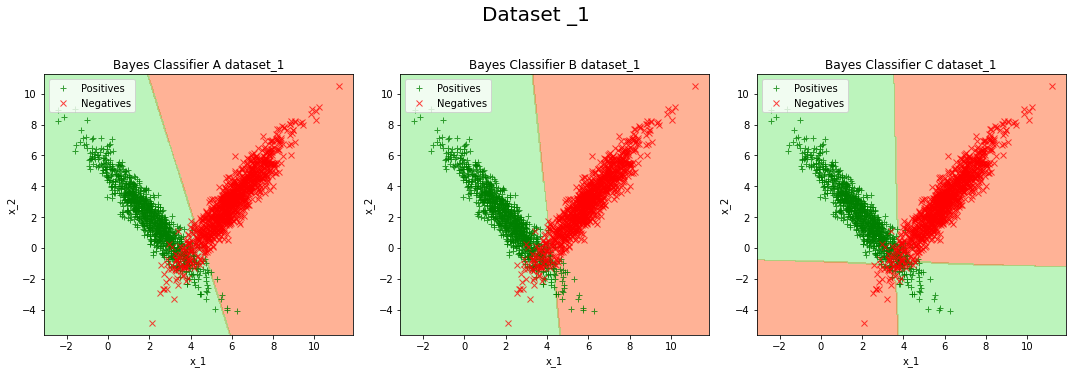

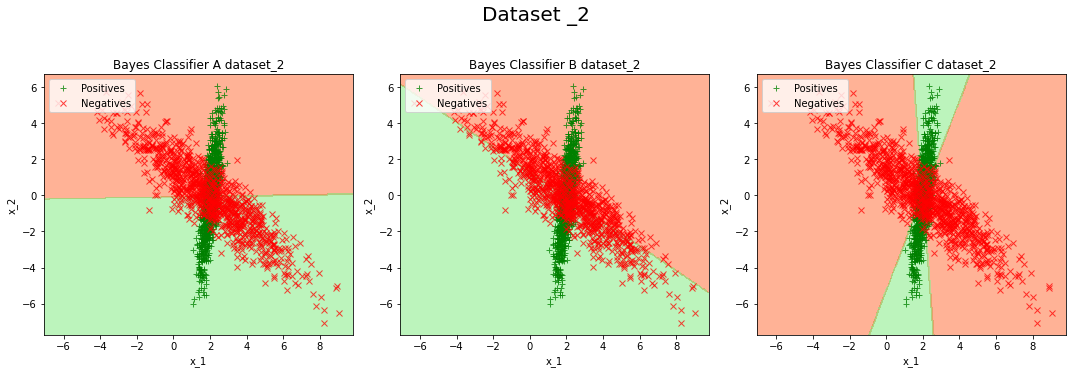

In [9]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def P4(dataset_path, data_num):
    dataset = np.load(dataset_path, mmap_mode = 'r')
    
    X_train = dataset['arr_0']
    Y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    
    _ = plt.rcParams["figure.figsize"] = 15,5
    _ = plt.rcParams["legend.loc"] = 'upper left'
    fig, ((f1,f2,f3)) = plt.subplots(1,3)
    sup = plt.suptitle("Dataset "+data_num,fontsize = 20)
    sup.set_position([.5, 1.03])
    f1.set_title("Bayes Classifier A dataset"+data_num)
    f2.set_title("Bayes Classifier B dataset"+data_num)
    f3.set_title("Bayes Classifier C dataset"+data_num)
    f1.set_xlabel("x_1")
    f1.set_ylabel("x_2")
    f2.set_xlabel("x_1")
    f2.set_ylabel("x_2")
    f3.set_xlabel("x_1")
    f3.set_ylabel("x_2")
    
    f1g, = f1.plot(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],'+',color = 'g',alpha=0.75)
    f1r, = f1.plot(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],'x',color = 'r',alpha=0.75)
    f1.legend([f1g,f1r],["Positives","Negatives"])
    
    f2g, = f2.plot(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],'+',color = 'g',alpha=0.75)
    f2r, = f2.plot(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],'x',color = 'r',alpha=0.75)
    f2.legend([f2g,f2r],["Positives","Negatives"])

    f3g, = f3.plot(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],'+',color = 'g',alpha=0.75)
    f3r, = f3.plot(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],'x',color = 'r',alpha=0.75)
    f3.legend([f3g,f3r],["Positives","Negatives"])

    fxmin,fxmax,fymin,fymax = f1.axis()
    x = np.linspace(fxmin, fxmax, 300)        ### These two lines can consume time. Set to ~300 for faster
    y = np.linspace(fymin, fymax, 300)        ### output. Set ~1000 for accurate plots.
    xx, yy = np.meshgrid(x, y)

    zz_a = function_for_A(X_train, Y_train, np.stack((xx.reshape(-1,1),yy.reshape(-1,1)),axis = -1).reshape(-1,2))
    zza = np.reshape(zz_a,xx.shape)
    f1.contourf(xx,yy,zza,alpha = 0.6,colors = ['coral','lightgreen'])

    zz_b = function_for_B(X_train, Y_train, np.stack((xx.reshape(-1,1),yy.reshape(-1,1)),axis = -1).reshape(-1,2))
    zzb = np.reshape(zz_b,xx.shape)
    f2.contourf(xx,yy,zzb,alpha = 0.6,colors = ['coral','lightgreen'])

    zz_c = function_for_C(X_train, Y_train, np.stack((xx.reshape(-1,1),yy.reshape(-1,1)),axis = -1).reshape(-1,2))
    zzc = np.reshape(zz_c,xx.shape)
    f3.contourf(xx,yy,zzc,alpha = 0.6,colors = ['coral','lightgreen'])

    _ = plt.tight_layout()
    
P4('datasetA.npz', data_num='_1')
P4('datasetB.npz', data_num='_2')

#### 4b) Give the ROC Curves for all the classifiers.



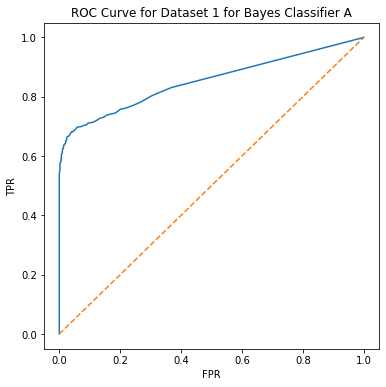

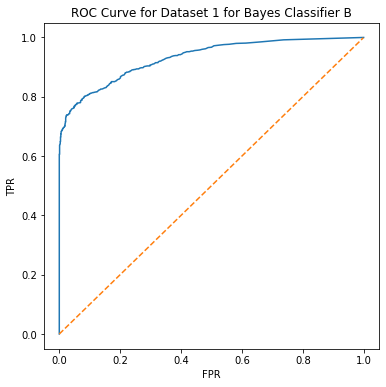

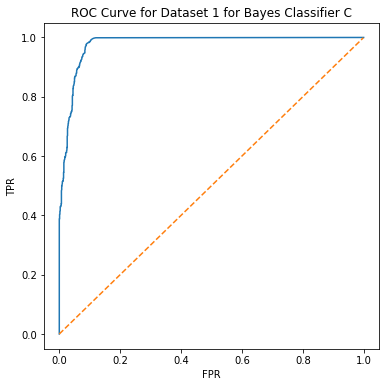

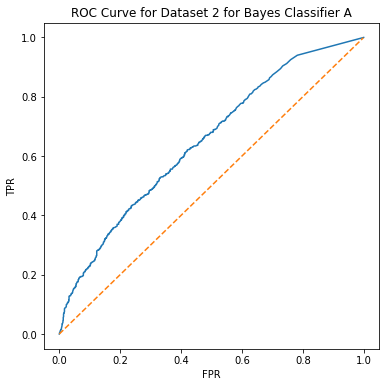

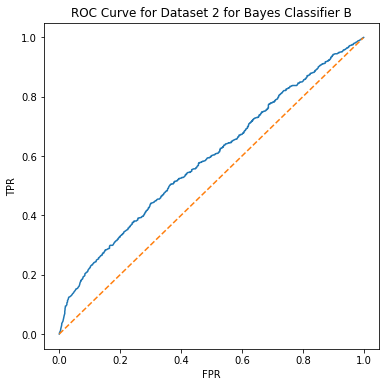

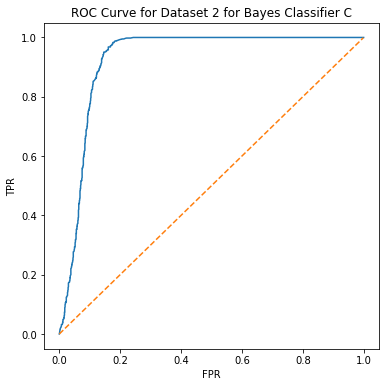

In [10]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

def plot_roc_curve(preds, probs, true, data_num, bayes_model):
    preds = np.array(preds)
    probs = np.array(probs)
    true = np.array(true)
    
    def get_conf_matrix(true, probs, threshold=0.5):
        tp=fp=tn=fn=0
        bool_true = [act== 1 for act in true]
        for truth, prob in zip(bool_true, probs):
            if prob > threshold:                       
                if truth:                               
                    tp += 1
                else:                                                
                    fp += 1          
            else:                                       
                if not truth:                           
                    tn += 1                          
                else:                                   
                    fn += 1
        if (fp + tn) != 0:            
            fpr = fp/(fp+tn)
        else:
            fpr = 0
        if (tp + fn) != 0:
            tpr = tp/(tp+fn)
        else:
            tpr = 0

        return {'fpr':fpr, 'tpr':tpr}
    
    low = min(probs)
    high = max(probs)
    step = (low + high)/1000
    
    thresholds = np.arange(low - step, high + step, step)
    
    confmatrices = []
    
    for thresh in thresholds:
        confmatrices.append(get_conf_matrix(true, probs, thresh))
        
    results = {}
    results['FPR'] = [x['fpr'] for x in confmatrices]
    results['TPR'] = [x['tpr'] for x in confmatrices]
    
    x_dot = np.arange(0,1, 0.001)
    y_dot = x_dot
    
    plt.figure(figsize = (6,6))
    plt.plot(results['FPR'], results['TPR'])
    plt.plot(x_dot, y_dot, linestyle = 'dashed')
    plt.title("ROC Curve for Dataset "+str(data_num)+" for Bayes Classifier " + bayes_model)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
    
def load_and_plot(dataset_path, data_num):
    dataset = np.load(dataset_path, mmap_mode = 'r')

    X_train = dataset['arr_0']
    Y_train = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']

    Y_pred_test_1a, prob_a = function_for_A(X_train, Y_train, X_test, ret_prob = 1)
    plot_roc_curve(Y_pred_test_1a, prob_a, Y_test, data_num, bayes_model = 'A')
    
    Y_pred_test_1b, prob_b = function_for_B(X_train, Y_train, X_test, ret_prob = 1)
    plot_roc_curve(Y_pred_test_1b, prob_b, Y_test, data_num, bayes_model = 'B')
    
    Y_pred_test_1c, prob_c = function_for_C(X_train, Y_train, X_test, ret_prob = 1)
    plot_roc_curve(Y_pred_test_1c, prob_c, Y_test, data_num, bayes_model = 'C')
    
load_and_plot('datasetA.npz', data_num = 1)
load_and_plot('datasetB.npz', data_num = 2)
plt.show()

#### 4c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x2 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)

The following table shows the accuracy values obtained by the three classifiers on the three datasets


| Classifier | Dataset_A | Dataset_B |
|------------|-----------|-----------|
|Bayes A| 93.4% | 49.15% |
|Bayes B| 93.25% | 49.6% |
|Bayes C| 96.55% | 84.4% |

#### 4d) In the next Textwrite cell, summarise your observations regarding the 6 learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)
- All Classifiers give a similar performance on the first dataset as the positive and negative classes have very different distributions from which they are sampled
- Bayes C gets an additional boost in performance since it assumes a different covariance for the two classes and hence is closer to a true representation of the data in one sense
- For the second dataset we can see that the mean of the distributions from which the two classes are sampled is very similar and hence any classifier which assumes the same covariance(known or unknown) for these data points performs poorly .
- Bayes C performs better on Dataset B since it is able to adjust for the error which would arise due to a similar mean by separating out the two classes based on their spread.
- Bayes C always tries to generate two decision boundaries in order to better separate those parts of the data that are overlapping